# Trabalho TCC USP

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS
#!pip3 install -U pyFTS
!pip3 install SimpSOM
!pip install dispy
#!pip install matplotlib==3.1.3
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-p3b8yxnf
  Running command git clone --filter=blob:none --quiet https://github.com/PYFTS/pyFTS /tmp/pip-req-build-p3b8yxnf
  Resolved https://github.com/PYFTS/pyFTS to commit 4c77ecc73fa0888132ac3996ca7e1f519dcf2fc8
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 64.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.1 which is incompatible.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.1 which is incompatible.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.1 which is incompatible.
simpsom 2.0.2 requires matplotlib>=3.3.3, but you have matplotlib 3.1.1 which is incompatible.


In [37]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures

In [120]:
from pyFTS.data import TAIEX, Malaysia, sunspots, artificial
from statsmodels.tsa.stattools import acf, pacf

datasets = {}

#dff = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosFalha.xlsx')
dff = pd.read_csv('../content/drive/MyDrive/TCCPriscila/Teste_Daily_Country_Wise_Confirmed_Cases.csv', ';')

#dfn = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosNormais.xlsx')
#dfn = pd.read_csv('../content/drive/MyDrive/TCCPriscila/Teste_Daily_Country_Wise_Confirmed_Cases.csv', ';')

dados = dff[0:112] 
#dados_teste_Falha = dff[0:112]

In [121]:
print(dados)#print dados

                      Country  23/05/2022  24/05/2022  25/05/2022  26/05/2022  \
0                     Nigeria           0           0           0           0   
1                    Cameroon           0           0           0           0   
2    Central African Republic           0           0           0           0   
3           Republic of Congo           0           0           0           0   
4                     England          36          14           7          24   
..                        ...         ...         ...         ...         ...   
107                    Jordan           0           0           0           0   
108                      Guam           0           0           0           0   
109                   Ukraine           0           0           0           0   
110                   Bahrain           0           0           0           0   
111                     China           0           0           0           0   

     27/05/2022  28/05/2022

###Analisando as Séries Temporais

In [122]:
dados2=dados.T

In [123]:
print(dados2)

                0         1                         2                  3    \
Country     Nigeria  Cameroon  Central African Republic  Republic of Congo   
23/05/2022        0         0                         0                  0   
24/05/2022        0         0                         0                  0   
25/05/2022        0         0                         0                  0   
26/05/2022        0         0                         0                  0   
...             ...       ...                       ...                ...   
18/09/2022        0         0                         0                  0   
19/09/2022        0         0                         0                  0   
20/09/2022        0         0                         0                  0   
21/09/2022        0         0                         0                  0   
22/09/2022        0         0                         0                  0   

                4                                 5         6  

In [137]:
print(dados2[11])

Country       France
23/05/2022         2
24/05/2022         2
25/05/2022         2
26/05/2022         0
               ...  
18/09/2022         0
19/09/2022         0
20/09/2022        45
21/09/2022         0
22/09/2022         0
Name: 11, Length: 124, dtype: object


In [145]:
print(dados2[12])

Country       Canada
23/05/2022        10
24/05/2022         0
25/05/2022         0
26/05/2022        11
               ...  
18/09/2022         0
19/09/2022         0
20/09/2022        18
21/09/2022         8
22/09/2022         0
Name: 12, Length: 124, dtype: object


In [154]:
teste1 = dados2[8]
teste11 = teste1[1:]
teste2 = dados2[7]
teste22 = teste2[1:]
teste3 = dados2[4]
teste33 = teste3[1:]
teste4 = dados2[12]
teste44 = teste4[1:]

In [155]:
#Dados com Falhas
from statsmodels.tsa.stattools import acf, pacf

datasets1 = {}

datasets1['EUA'] = teste11
datasets1['Spain'] = teste22
datasets1['UK'] = teste33
datasets1['France'] = teste44

print(datasets1)

{'EUA': 23/05/2022      0
24/05/2022      2
25/05/2022      2
26/05/2022      5
27/05/2022      4
             ... 
18/09/2022      0
19/09/2022    391
20/09/2022    311
21/09/2022    157
22/09/2022    205
Name: 8, Length: 123, dtype: object, 'Spain': 23/05/2022     1
24/05/2022     4
25/05/2022     8
26/05/2022    25
27/05/2022    21
              ..
18/09/2022     0
19/09/2022     0
20/09/2022    46
21/09/2022     0
22/09/2022     0
Name: 7, Length: 123, dtype: object, 'UK': 23/05/2022    36
24/05/2022    14
25/05/2022     7
26/05/2022    24
27/05/2022     0
              ..
18/09/2022     0
19/09/2022     0
20/09/2022    29
21/09/2022     0
22/09/2022     0
Name: 4, Length: 123, dtype: object, 'France': 23/05/2022    10
24/05/2022     0
25/05/2022     0
26/05/2022    11
27/05/2022     0
              ..
18/09/2022     0
19/09/2022     0
20/09/2022    18
21/09/2022     8
22/09/2022     0
Name: 12, Length: 123, dtype: object}


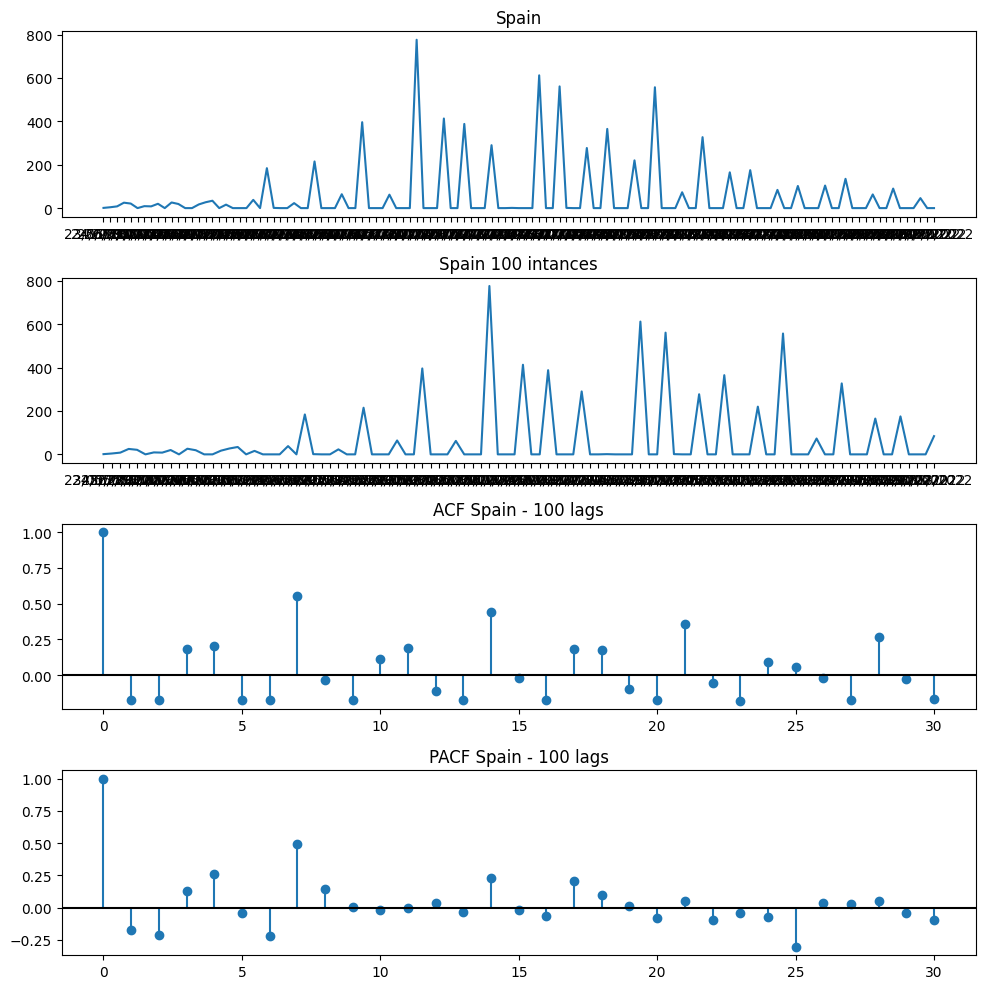

In [178]:
#Dados com Falhas
from statsmodels.tsa.stattools import acf, pacf

datasets1 = {}

#datasets1['EUA'] = teste11
datasets1['Spain'] = teste22
#datasets1['UK'] = teste33
#datasets1['France'] = teste44


fig1, ax = plt.subplots(nrows=4, ncols=1, figsize=[10,10])
  
for ct, (key, data) in enumerate(datasets1.items()): 
  _lags = np.arange(0,31)
  _acf = acf(data,nlags=30)
  _pacf = pacf(data,nlags=30)

  ax[0].set_title("{}".format(key))
  ax[0].plot(data)
  
  ax[1].set_title("{} 100 intances".format(key))
  ax[1].plot(data[:100])
  
  ax[2].set_title("ACF {} - 100 lags".format(key))
  ax[2].plot(_lags, _acf, "o")
  ax[2].vlines(_lags,[0],_acf)
  ax[2].axhline(y=0, color='black')
  
  ax[3].set_title("PACF {} - 100 lags".format(key))
  ax[3].plot(_lags, _pacf, "o")
  ax[3].vlines(_lags,[0],_pacf)
  ax[3].axhline(y=0, color='black')


plt.tight_layout()